In [106]:
import numpy as np
import re
import pickle
import gzip

import sys
sys.path.append('/Users/chenwei/Desktop/Github/ViDa') 

import imp, vida.data_processing.utils
imp.reload(vida.data_processing.utils)
from vida.data_processing.utils import *

import imp, vida.adjmat.dp2adj
imp.reload(vida.adjmat.dp2adj)
from vida.adjmat.dp2adj import *

import imp, vida.data_processing.comp_time
imp.reload(vida.data_processing.comp_time)
from vida.data_processing.comp_time import *


## three way

In [2]:
fpath = '/Users/chenwei/Desktop/Github/ViDa/temp'
rxn = 'tut06'
ref_strands = 'CGAGGTGAGTGACGTGCGGTACCCAC+GTGGGTACCGCACGTCACTCACCTCG+CGAGGTGAGTGACGTGCGGT'
strand_a = 'CGAGGTGAGTGACGTGCGGTACCCAC'
strand_b = 'GTGGGTACCGCACGTCACTCACCTCG'
strand_c = 'CGAGGTGAGTGACGTGCGGT'
strand_list = [strand_a, strand_b, strand_c]

ref_name_list = assign_base_names(ref_strands)
ref_name = [item for sublist in ref_name_list for item in sublist]


### read files

In [3]:
trajs_seqs, trajs_states, trajs_times, trajs_energies = read_machinek(fpath,rxn,strand_a,num_files=2)

### preprocess

In [4]:
dp_arr, dp_og, pair, energy, trans_time = concat_machinek(trajs_states, trajs_times, trajs_energies)
dp_uniq, dp_og_uniq, pair_uniq, energy_uniq, indices_uniq, indices_all = get_uniq(dp_arr, dp_og, pair, energy)

In [5]:
dp_og.shape, dp_arr.shape, energy.shape, trans_time.shape

((441,), (2,), (441,), (441,))

### collect time

In [6]:
hold_time, trj_id = sim_ht(trans_time)
hold_time_uniq = mean_holdingtime(hold_time, indices_uniq, indices_all)
cum_time_uniq,freq_uniq = cumu_holdingtime(hold_time, indices_uniq, indices_all)


### dp to adj

In [ ]:
adj = sim_adj_3strand(dp_arr, trajs_seqs, ref_name, ref_name_list, strand_list)
adj_uniq = adj[indices_uniq]

In [43]:
combined_array = np.concatenate(adj, axis=0)
combined_array.shape

(441, 72, 72)

## Draw

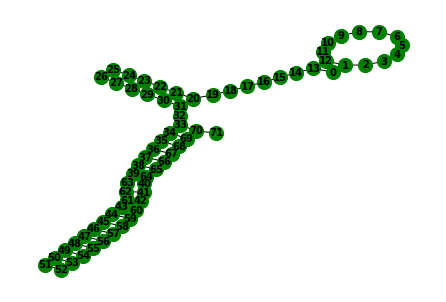

In [60]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a graph from the adjacency matrix
G = nx.Graph(adj[10])

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True, font_weight='bold', node_size=200, node_color='green', font_size=10, font_color='black')
# nx.draw(G, with_labels=True, font_weight='bold', node_size=200, node_color='green', font_size=10, font_color='black')


# Show the plot
plt.show()


### Debug

In [2]:
import numpy as np
import re
import pickle
import gzip

import sys
sys.path.append('/Users/chenwei/Desktop/Github/ViDa') 

import imp, vida.data_processing.utils
imp.reload(vida.data_processing.utils)
from vida.data_processing.utils import *

import imp, vida.adjmat.dp2adj
imp.reload(vida.adjmat.dp2adj)
from vida.adjmat.dp2adj import *

import imp, vida.data_processing.comp_time
imp.reload(vida.data_processing.comp_time)
from vida.data_processing.comp_time import *


/var/folders/z9/3zs_cg3x09n1q9fmthyx2x600000gn/T/ipykernel_25608/704395099.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, vida.data_processing.utils


In [242]:
# inpath = '../data/post_data/Machinek-PRF/preprocess_Machinek-PRF.npz'
# loaded_data = np.load(inpath, allow_pickle=True)
# dp_uniq = loaded_data['dp_uniq']
# dp_arr = loaded_data['dp_arr']
# indices_uniq = loaded_data['indices_uniq']
# indices_all = loaded_data['indices_all']
# trans_time = loaded_data["trans_time"]

inpath2 = '../data/post_data/Machinek-PRF/Machinek-PRF.pkl.gz'
with gzip.open(inpath2, 'rb') as file:
    load_data_seq = pickle.load(file)
trajs_seqs = load_data_seq["trajs_seqs"]
ref_name = load_data_seq["ref_name"]
ref_name_list = load_data_seq["ref_name_list"]
strand_list = load_data_seq["strand_list"]
trajs_energies = load_data_seq['trajs_energies']

In [241]:
ll = 0
for i in range(len(trajs_energies)):
    ll += len(trajs_energies[i])
    
print(ll)

12374235


In [3]:
inpath3 = '../data/post_data/Machinek-PRF/adjmat_Machinek-PRF.npz'
loaded_data3 = np.load(inpath3, allow_pickle=True)
adj_uniq = loaded_data3['adj_uniq']
adj_uniq.shape

(60889, 84, 84)

In [203]:
kk = 100

dp_arr_part = dp_arr[:1]
adj_all = sim_adj_3strand(dp_arr_part, trajs_seqs, ref_name, ref_name_list, strand_list)

idx = np.where(indices_uniq == kk)[0][0]
adj_uniq[idx], indices_uniq[idx], loaded_data['dp_uniq'][idx], dp_arr[0][kk]


(array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 100,
 '...........((((((((((((((((................))))))))))))))))...........(.......).....',
 '...........((((((((((((((((................))))))))))))))))...........(.......).....')

In [204]:
np.all(adj_all[kk] == adj_uniq[idx])

True

In [1]:
inpath4 = '../data/post_data/Machinek-PRF/time_Machinek-PRF.npz'
loaded_data4 = np.load(inpath4, allow_pickle=True)
trj_id = loaded_data4['trj_id']

trj_id.shape

NameError: name 'np' is not defined

In [215]:
trj_id

array([  10769,   69832,   76024,   95153,  105671,  116359,  122771,
        143064,  157393,  168092,  177675,  198203,  209170,  216725,
        229690,  236399,  252364,  268621,  280048,  308170,  325078,
        343025,  373848,  382381,  390651,  415450,  448946,  460025,
        484213,  487049,  496763,  514344,  538694,  551116,  563269,
        584364,  679035,  685308,  724891,  770495,  799597,  851650,
        854054,  875085,  899263,  904968,  917799,  937813,  955707,
        962613,  969741,  981369, 1011282, 1021329, 1030632, 1053923,
       1074547, 1114785, 1132375, 1137271, 1146677, 1152734, 1169396,
       1218846, 1229387, 1261568, 1288371, 1302291, 1349807, 1372197,
       1387562, 1394378, 1405271, 1429520, 1445309, 1457295, 1476756,
       1478977, 1493855, 1513946, 1522939, 1545575, 1556726, 1562636,
       1596423, 1610193, 1629926, 1661246, 1699649, 1715947, 1728034,
       1736571, 1748867, 1755575, 1811898, 1828427, 1832443, 1849746,
       1862673, 1914

In [207]:
np.where(trans_time==0)[0].shape

(100,)

In [208]:
def sim_ht(trans_time):
    """calculate holding time for each trajectory
    """
    hold_time = np.array([])
    idx = np.where(trans_time==0)[0]
    
    for i in range(len(idx)):
        if i < len(idx)-1:
            temp_t = trans_time[idx[i]:idx[i+1]]
            hold_time = np.append(hold_time,np.concatenate([np.diff(temp_t),[0]]))
        else:
            temp_t = trans_time[idx[i]:]
            hold_time = np.append(hold_time,np.concatenate([np.diff(temp_t),[0]]))
    
    # get each individual trajectory's index
    trj_id = np.where(hold_time==0)[0]

    return hold_time, trj_id


In [209]:
hold_time, trj_id = sim_ht(trans_time)

In [211]:
hold_time.shape

(1914651,)

In [ ]:
idx = np.where(trans_time==0)[0]
idx

In [ ]:
trj_id[:30]

In [174]:
trans_time[10770]

0.0

In [212]:
inpath4 = '../data/post_data/Gao-P4T4/time_Gao-P4T4.npz'
loaded_data4 = np.load(inpath4, allow_pickle=True)
trj_id = loaded_data4['trj_id']

In [213]:
trj_id

array([   541,  20693,  21093,  31997,  33651,  35387,  55145,  58421,
        62935,  84699,  88899,  90719,  96253, 101279, 105553, 106159,
       112879, 113317, 113591, 113949, 115039, 118043, 119387, 119579,
       125291, 125881, 129841, 130061, 131031, 133205, 133775, 142687,
       147287, 154125, 156461, 178765, 179005, 181659, 203569, 208021,
       212077, 225139, 225575, 225913, 233545, 245495, 248459, 256725,
       258061, 264921, 270795, 273675, 277357, 280367, 283705, 294919,
       296321, 304619, 315561, 318829, 327959, 332921, 387683, 394249,
       395239, 400233, 402629, 403529, 428301, 442043, 448757, 452381,
       455351, 476653, 489015, 498429, 498723, 506105, 514727, 518251,
       521661, 522023, 525073, 526713, 543131, 556337, 556513, 556617,
       558549, 564259, 569929, 587549, 590207, 599209, 602851, 604871,
       605001, 606855, 607069, 621983])

In [178]:
inpath4 = '../data/post_data/Gao-P4T4/time_Gao-P4T4.npz'
loaded_data4 = np.load(inpath4, allow_pickle=True)
trj_id = loaded_data4['trj_id']



inpath = '../data/post_data/Gao-P4T4/preprocess_Gao-P4T4.npz'
loaded_data = np.load(inpath, allow_pickle=True)
dp_uniq = loaded_data['dp_uniq']
indices_uniq = loaded_data['indices_uniq']
indices_all = loaded_data['indices_all']
trans_time = loaded_data["trans_time"]


In [217]:
import torch

In [219]:
edge_index = torch.tensor([[0, 1], [1, 2], [2, 0], [1, 3]], dtype=torch.long)
edge_index

tensor([[0, 1],
        [1, 2],
        [2, 0],
        [1, 3]])

In [220]:
edge_index.t().contiguous()

tensor([[0, 1, 2, 1],
        [1, 2, 0, 3]])

In [221]:
edge_index.t()

tensor([[0, 1, 2, 1],
        [1, 2, 0, 3]])

In [222]:
i = [0,1,2,3]

In [223]:
i[:-1]

[0, 1, 2]

In [224]:
i[-1]

3